# Bonds exploratory analysis

In [1]:
%config InlineBackend.figure_format = "retina"

import os

import numpy as np
import pandas as pd
import warnings
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter("ignore")
register_matplotlib_converters()

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

## Data munging

In [3]:
data_dir = 'data/'

In [ ]:
dfs = []
reference = {
    'DGS1MO.csv': 'one_month',
    'DGS3MO.csv': 'three_months',
    'DGS1.csv': 'one_year',
    'DGS2.csv': 'two_years',
    'DGS3.csv': 'three_years',
    'DGS5.csv': 'five_years',
    'DGS10.csv': 'ten_years',
    'DGS30.csv': 'thirty_years'
}

for file in os.listdir(data_dir):
    series = reference[file]
    df = pd.read_csv(os.path.join(data_dir, file),
                     names=['date', series],
                     skiprows=1,
                     index_col='date',
                     parse_dates=['date'],
                     na_values='.')
    dfs.append(df)

bonds = pd.concat(dfs, axis=1)
bonds = bonds.reindex(columns=[
    'one_month', 'three_months', 'one_year', 'two_years', 'three_years',
    'five_years', 'ten_years', 'thirty_years'
],
                      copy=False)
bonds.to_csv(os.path.join(data_dir, 'bonds.csv'))

## Exploration

In [4]:
bonds = pd.read_csv(os.path.join(data_dir, 'bonds.csv'), index_col='date', parse_dates=['date'])

In [5]:
bonds.tail()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years
date,,,,,,,,
2019-08-23,2.07,1.97,1.73,1.51,1.43,1.40,1.52,2.02
2019-08-26,2.09,2.01,1.75,1.54,1.47,1.43,1.54,2.04
2019-08-27,2.07,1.98,1.77,1.53,1.43,1.40,1.49,1.97
2019-08-28,2.07,1.99,1.74,1.50,1.42,1.37,1.47,1.94
2019-08-29,2.10,1.99,1.75,1.53,1.44,1.40,1.50,1.97


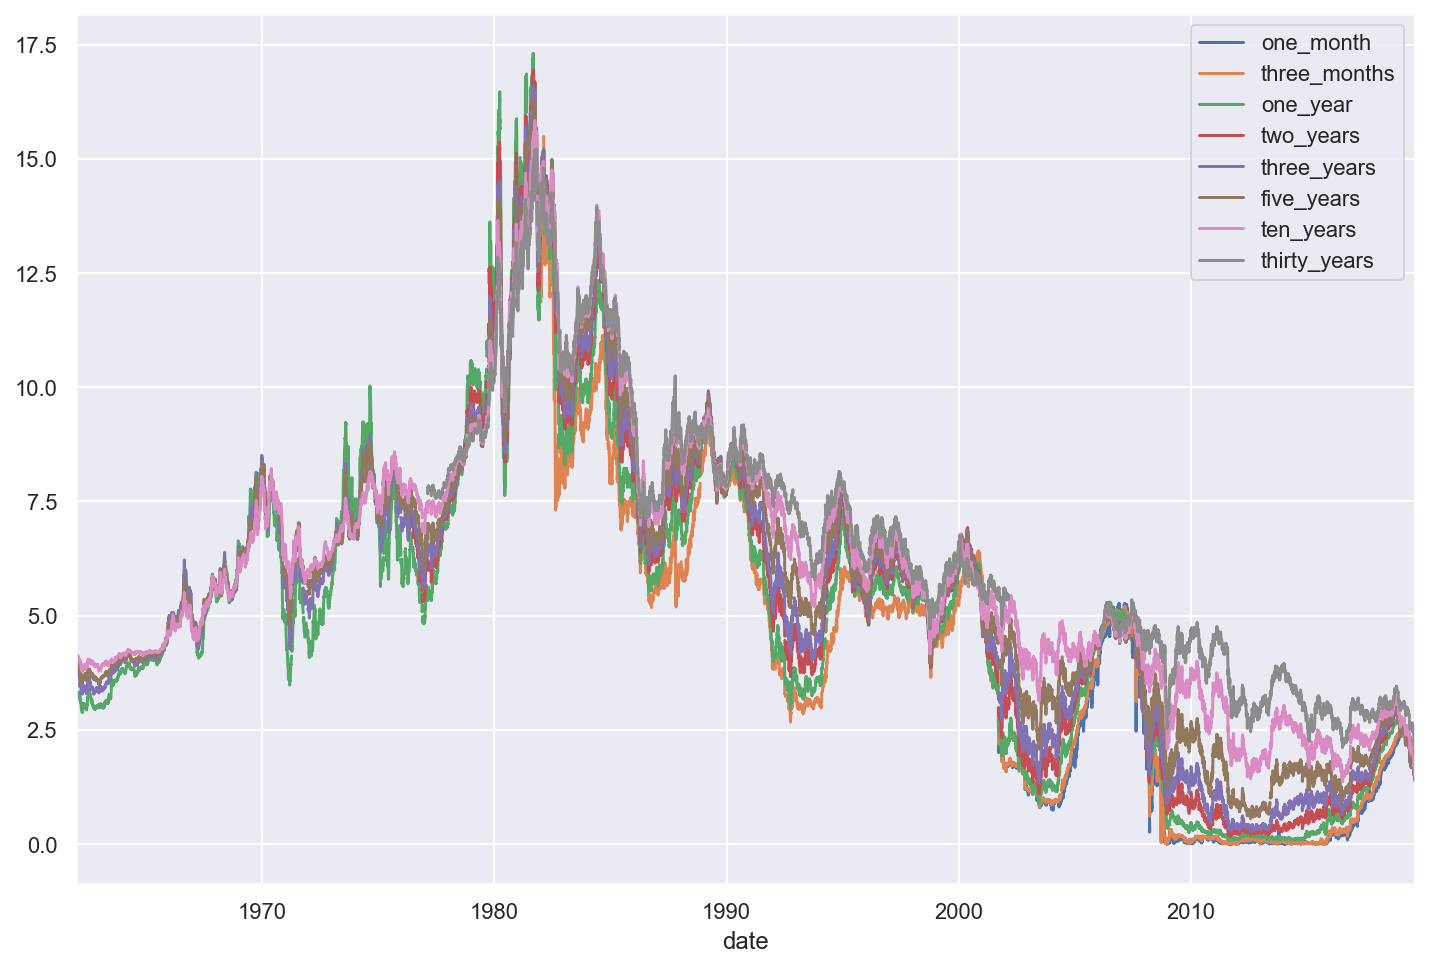

In [6]:
bonds.plot();

In [7]:
bonds_2000s = bonds.loc['2000':]

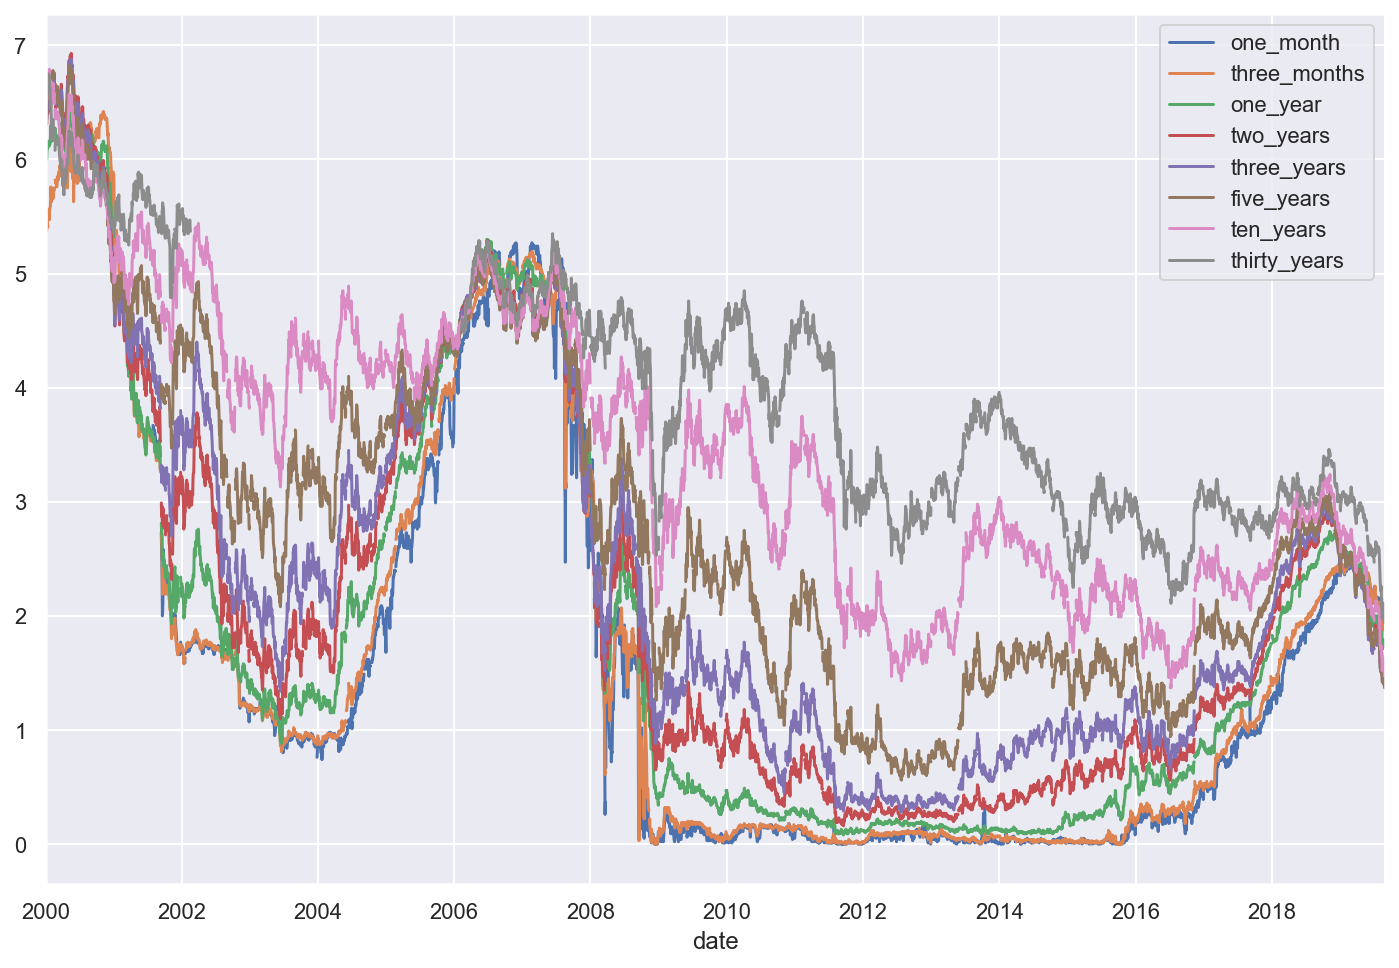

In [8]:
bonds_2000s.plot();

In [9]:
bonds_2019 = bonds.loc['2019']

In [10]:
bonds_2019.head()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years
date,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,2.40,2.42,2.60,2.50,2.47,2.49,2.66,2.97
2019-01-03,2.42,2.41,2.50,2.39,2.35,2.37,2.56,2.92
2019-01-04,2.40,2.42,2.57,2.50,2.47,2.49,2.67,2.98
2019-01-07,2.42,2.45,2.58,2.53,2.51,2.53,2.70,2.99


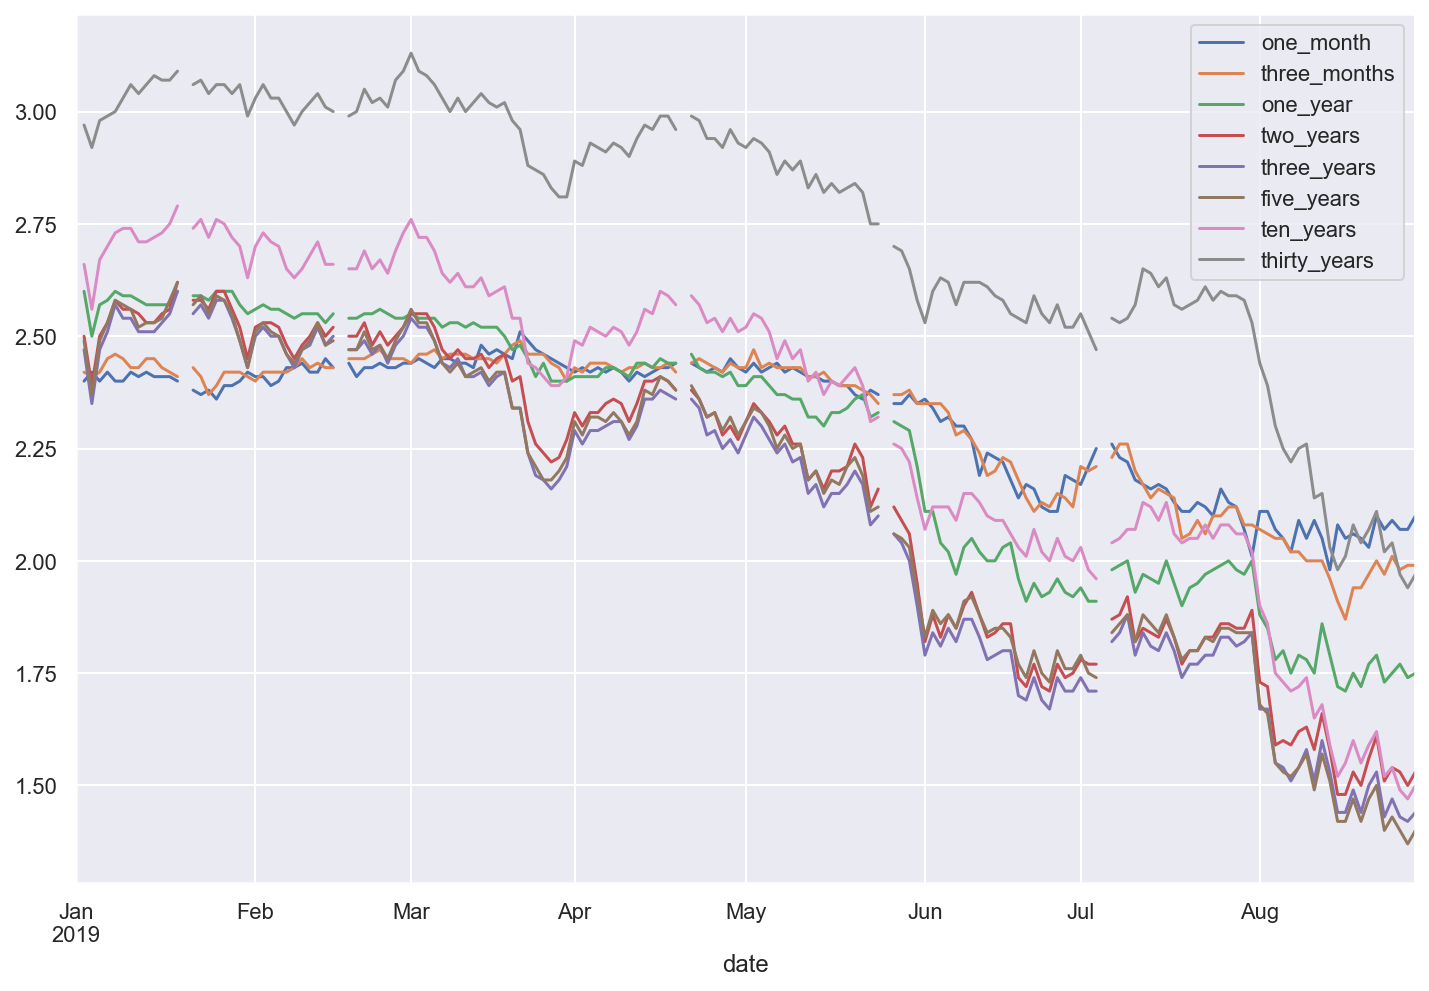

In [11]:
bonds_2019.plot()

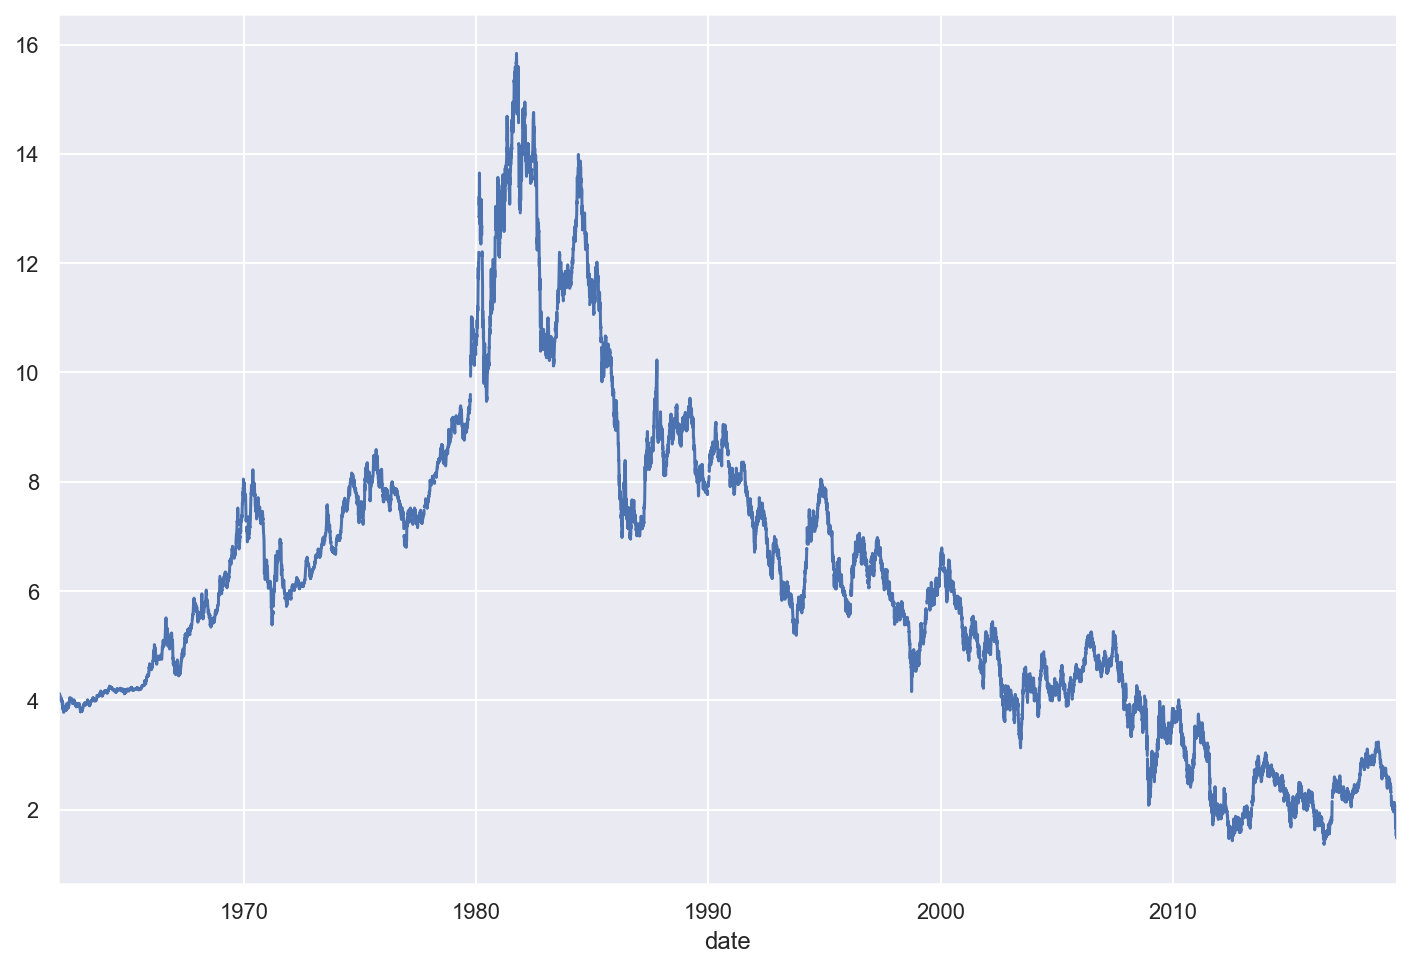

In [12]:
bonds['ten_years'].plot();

In [ ]:
`